In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from data.utils import rgb2binary
from tqdm.notebook import tqdm
import math
%matplotlib inline

import glob
import os
from collections import deque

In [2]:
# open in set(['G', '.', 'S']) closed  in set(['O', '@','T', 'W', '#']) 
def ReadMapFromMovingAIFile(path):
    height = 0
    width = 0
    with open(path, 'r') as map_file:
        for m, line in enumerate(map_file.readlines()):
            if m > 0 and m < 3:
                name, v = line.split(' ')
                
                if name.startswith('h'):
                    height = int(v)
                else:
                    width = int(v)
                    
            elif m == 3:
                cells = [[0 for _ in range(width)] for _ in range(height)]
                i = 0

            elif m >= 4:
                j = 0
                for c in line:
                    if c == '.' or c == 'G' or c == 'S':
                        cells[i][j] = 255
                    elif c == 'O' or c == '@' or c == 'T' or c == '#' or c == 'W':
                        cells[i][j] = 0
                    else:
                        continue
            
                    j += 1
                
                if j != width:
                    raise Exception("Size Error. Map width = ", j, ", but must be", width, "(map line: ", i, ")")
                
                i += 1

    return cells


In [3]:
def show_map(img_arr, no_axis=True, dpi=150):
    fig, ax = plt.subplots(dpi=dpi)
    if no_axis:
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
    ax.imshow(img_arr);

In [4]:
colors = {'start': np.array([0, 0, 1]),
          'goal': np.array([1, 0, 0]),
          'roi': np.array([0, 1, 0]),
          'open': np.array([1, 1, 0])}

In [5]:
map_path = './data/dataset/OpnAI_map/'
mapFilenamesList = glob.glob(map_path + '*.map')
mapFilenamesList

['./data/dataset/OpnAI_map\\Archipelago.map',
 './data/dataset/OpnAI_map\\BigGameHunters.map',
 './data/dataset/OpnAI_map\\blastedlands.map',
 './data/dataset/OpnAI_map\\brc000d.map',
 './data/dataset/OpnAI_map\\Caldera.map',
 './data/dataset/OpnAI_map\\Desolation.map',
 './data/dataset/OpnAI_map\\Elderlands.map',
 './data/dataset/OpnAI_map\\Entanglement.map',
 './data/dataset/OpnAI_map\\petrifiedforest.map',
 './data/dataset/OpnAI_map\\Tribes.map']

In [8]:
def map_creation(path):
    head, f_name = os.path.split(os.path.splitext(path)[0])
    map_path_ = head + '/maps_64'
    init_map_path = head + '/maps'
    
    m = ReadMapFromMovingAIFile(path)
    init_map = np.stack([np.array(m)]*3, axis=2)
    init_map = rgb2binary(init_map)

    
    if not os.path.exists(init_map_path):
        os.mkdir(init_map_path)
        
    plt.imsave(init_map_path + f"/{f_name}.png", init_map, cmap='gray')
    
    map1 = Image.open(init_map_path + f"/{f_name}.png")
    map_64 = map1.resize((64,64), resample=Image.NEAREST).convert('RGB')
    map_64 = rgb2binary(np.array(map_64))
    
    if not os.path.exists(map_path_):
        os.mkdir(map_path_)
        
    plt.imsave(map_path_ + f"/{f_name}_64.png", map_64, cmap='gray')        

In [9]:
_ = deque(map(map_creation, mapFilenamesList))

In [19]:
img_path = './data/dataset/OpnAI_map/maps_64'
pngFilenamesList = glob.glob(img_path + '/*.png')

In [27]:
imgs = [np.array(Image.open(img_path).convert('L'))for img_path in pngFilenamesList] 
imgs = [rgb2binary(img) for img in imgs]

In [28]:
len(imgs)

10

In [29]:
from data.utils import make_grid

In [37]:
grid = make_grid(imgs, n_maps=10, margin=2)

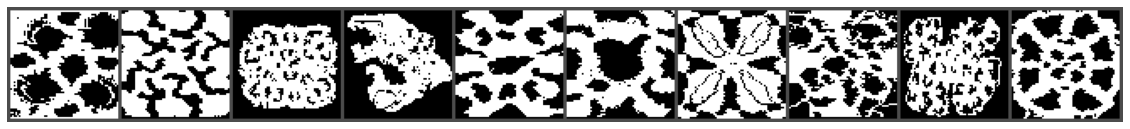

In [38]:
plt.figure(figsize=(20, 8))
plt.imshow(grid, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
init_map = np.stack([np.array(m)]*3, axis=2)

In [53]:
init_map.shape

(512, 512, 3)

In [12]:
init_map = rgb2binary(init_map)

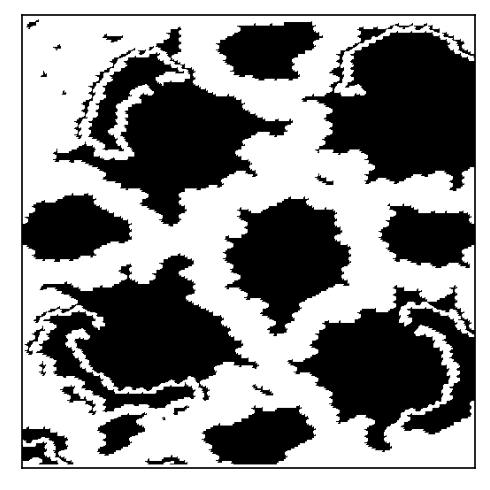

In [14]:
show_map(init_map)

In [22]:
_, f_name = os.path.split(os.path.splitext(mapFilenamesList[0])[0])

In [25]:
if not os.path.exists(map_path + '/maps'):
    init_map_path = map_path + '/maps'
    os.mkdir(init_map_path)
plt.imsave(init_map_path + f"/{f_name}.png", init_map, cmap='gray')

In [36]:
map1 = Image.open(init_map_path + f"/{f_name}.png")

In [37]:
map1.size

(512, 512)

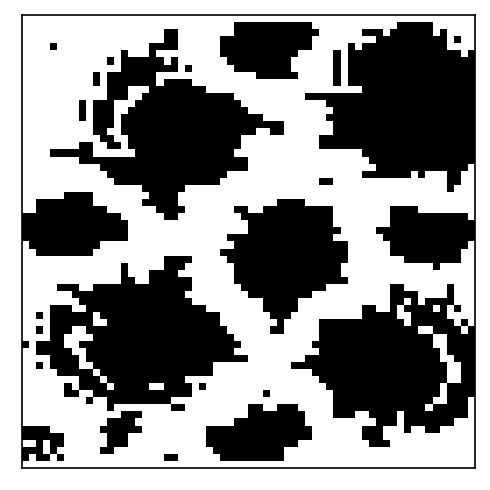

In [50]:
map_64 = map1.resize((64,64), resample=Image.NEAREST).convert('RGB')
show_map(map_64)

In [51]:
map_64 = np.array(map_64)
map_64 = rgb2binary(map_64)

In [52]:
map_64.shape

(64, 64, 3)

In [54]:
if not os.path.exists(map_path + '/maps_64'):
    map_path_ = map_path + '/maps_64'
    os.mkdir(map_path_)
plt.imsave(map_path_ + f"/{f_name}_64.png", map_64, cmap='gray')    

In [158]:
map1 = Image.open('map_brc000d.png')

In [159]:
map1.size

(257, 261)

In [154]:
pil_img = Image.fromarray(map_brc.astype('uint8'), 'RGB')

In [ ]:
plt.imsave(f"map_{'brc000d'}_64_64.png", m, cmap='gray')

In [ ]:
Image.fromarray(numpy_image.astype('uint8'), 'L')

In [66]:
from collections import namedtuple

In [67]:
def ReadTasksFromMovingAIFile(path):
    Task = namedtuple('Task', ['Bucket', 'map_file', 'width', 'height', 'jStart', 'iStart', 'jGoal', 'iGoal', 'optimal_length'])
    tasks = []
    with open(path, 'r') as task_file:
        for i, line in enumerate(task_file.readlines()):
            if i > 0:
                if i == 1:
                    print(line.strip().split())
                tasks.append(Task._make(line.strip().split()))     
    return tasks 

In [68]:
tasks = ReadTasksFromMovingAIFile('./OpnAI_map/brc000d.map.scen')

['0', 'brc000d.map', '257', '261', '75', '193', '77', '195', '2.82842712']


In [112]:
for i, task in enumerate(tasks):
    if float(task.optimal_length) >101:
        print(task)
        print(i)
        break    

Task(Bucket='25', map_file='brc000d.map', width='257', height='261', jStart='142', iStart='229', jGoal='196', iGoal='149', optimal_length='102.36753235')
250


In [113]:
test_task = tasks[i]

In [114]:
map_brc_task = np.ones_like(map_brc, dtype=np.float)

In [115]:
map_brc_task[int(test_task.iGoal), int(test_task.jGoal)] = colors.get('goal')
map_brc_task[int(test_task.iStart), int(test_task.jStart)] = colors.get('start')

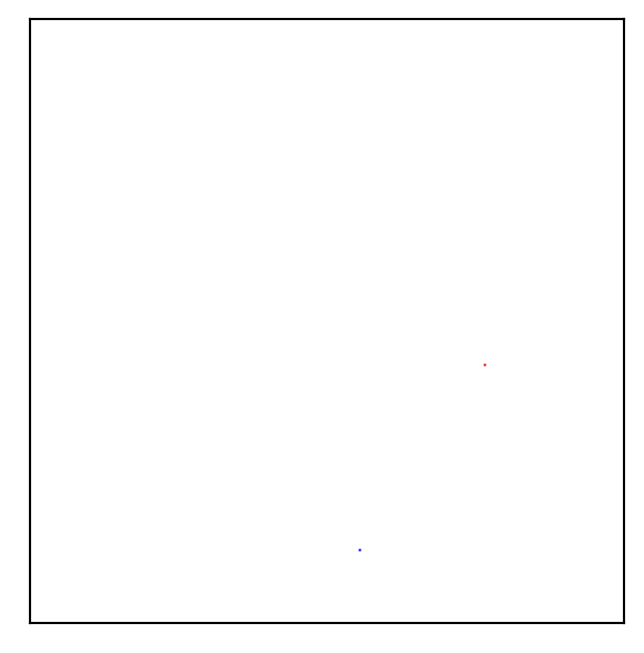

In [116]:
show_map(map_brc_task, dpi=200)

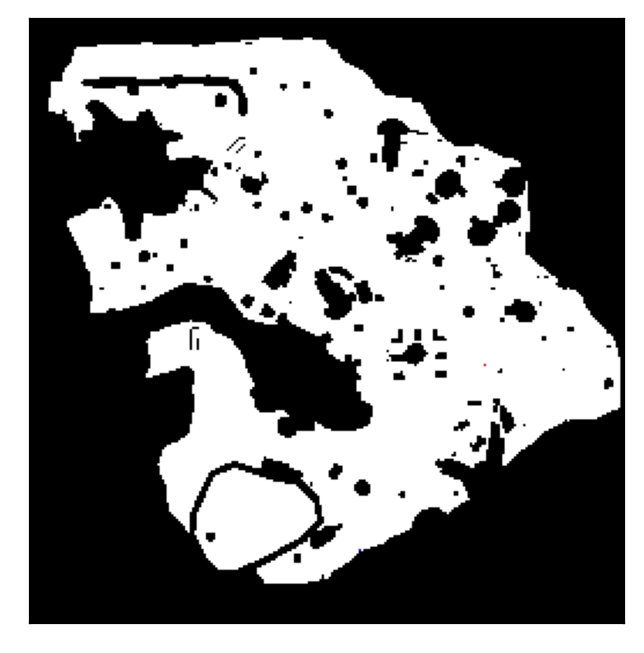

In [117]:
grid = map_brc.copy()
grid[int(test_task.iGoal), int(test_task.jGoal)] = colors.get('goal')
grid[int(test_task.iStart), int(test_task.jStart)] = colors.get('start')
show_map(grid, dpi=200)

In [118]:
start = (int(test_task.iStart), int(test_task.jStart))
goal = (int(test_task.iGoal), int(test_task.jGoal))
grid = map_brc.copy()

In [119]:
n_runs = 50
model = RRT()

In [120]:
roi = np.ones(map_brc.shape)
for it in tqdm(range(n_runs)):
    path = model.search(map_brc[..., 1], start, goal)

    for x in path:
        grid[x[0], x[1], :] = colors['roi']
        roi[x[0], x[1], :] = colors['roi']
        
grid[start[0], start[1], :] = colors['start']
grid[goal[0], goal[1], :] = colors['goal']

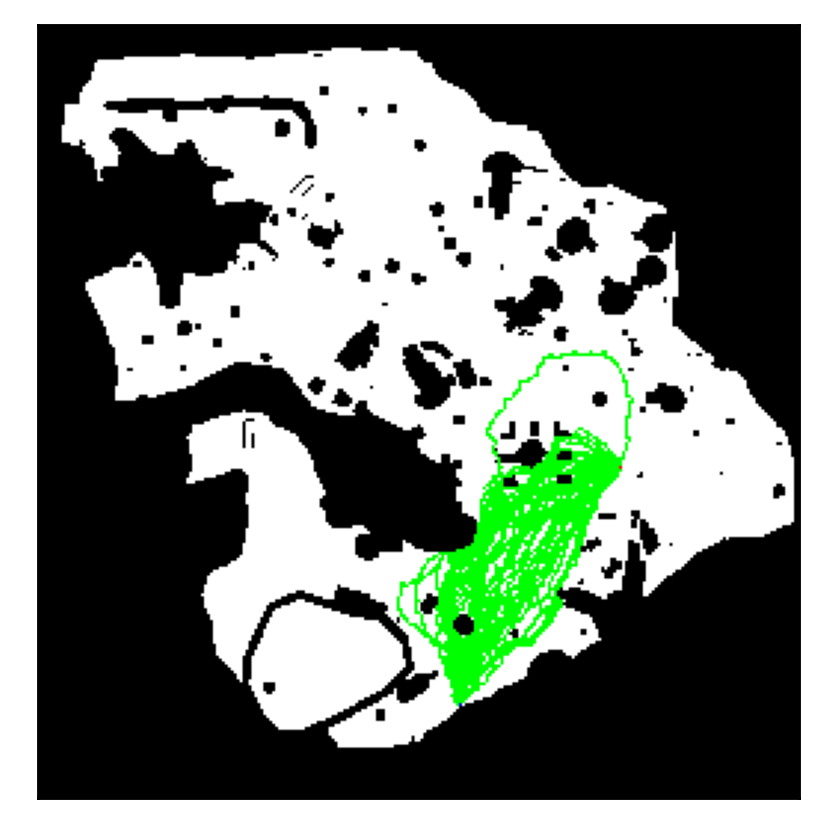

In [121]:
show_map(grid, dpi=256)

In [122]:
t = list(filter(lambda x: 24 < float(x.optimal_length) <101, tasks))

In [123]:
len(t)

191